# Spot Checking Models, Pipelines and Hyperparameter Tuning (Regression)
**OPIM 5512: Data Science Using Python - University of Connecticut**

---------------------------------
Let's show how we can assess a variety of regression models (quickly) using their default settings, then tweak the one the most accurate model using a grid search.

This is a more advanced approach to modeling than our previous 'general modeling framework'. Your skills will mature and become more sophisticated as we move through the material. You are becoming a real modeler now!

# What is "Spot Checking"?
I first heard the term 'spot checking' from Jason Brownlee's book - it's not only a great term, but it really is a great methodology to evaluate a host of 'quick-fitting' candidate models to get a feel for whether or not your data has ANY predictive power.

Once we see whether or not our dataset is any good for regression problem, we pick one of the spot check models we evaluated and proceed to perform an in-depth hyperparameter tuning. 

This is a very reasonable first step in modeling - try a few out, pick the best one, tweak it a bit to see if you can get more performance (lower error) out of your model!

Later on, you may opt to perform a grid search on A LOT of different models and then simply output the best configuration - we will do this! But if you're in a pickle at work and need to turn around something fast, this is what you should do. It's easy to explain and your boss will love the boxplots! Scroll down for more info.

# What Are Some Good 'Spot Checking' Models? (Regression)
The main 'spot checking' models for regression are:
* Linear Regression
* LASSO Regression
* Elastic Net
* Decision Tree (DT)
* k-Nearest Neighbor (KNN)
* Support Vector Machine (SVM)

These are simple estimators - they run quickly and are relatively easy to explain to your boss. 

In [25]:
# Regression Project: Boston House Prices

# Load libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# pre-processing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# simple spotcheck models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# more advanced ensemble models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor

# error metrics
from sklearn.metrics import mean_squared_error


In [26]:
# Load dataset
# we will use Gdown to load our Boston Housing dataset
# https://drive.google.com/file/d/1a0aNGSFWB-pf5ut1NsjE5ECIsbHHoAwI/view?usp=sharing
!gdown 1a0aNGSFWB-pf5ut1NsjE5ECIsbHHoAwI

# look left! it downloaded a local copy of 'BostonHousing.csv'

Downloading...
From: https://drive.google.com/uc?id=1a0aNGSFWB-pf5ut1NsjE5ECIsbHHoAwI
To: /content/BostonHousing.csv
100% 35.2k/35.2k [00:00<00:00, 39.3MB/s]


In [27]:
df = pd.read_csv('BostonHousing.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


A nice clean dataset! How lucky are you? :)

# General Spot Checking Steps
* Make basic visualizations
* Prepare the data for modeling
* Make a list of models
* Fit the models and store results
* Evaluate and compare the algorithms

# Basic Visualizations
When reading a dataset, you can make some quick histograms, boxplots or density plots to show what your dataset looks like.

## Histograms
Instead of going one by one through the columns on a new dataset, you can show them all at once (assuming you don't have too many.)

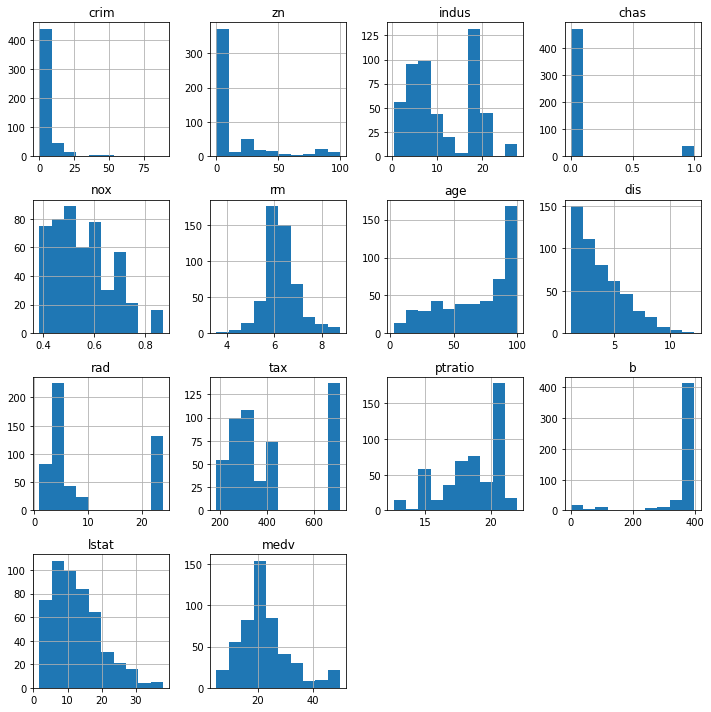

In [28]:
# histograms
df.hist()
plt.rcParams["figure.figsize"] = (15,15) # a nice way of specifying dimensions after the image is drawn!
plt.tight_layout() # this will help spread out the plots!
plt.show()

# try (5,5), (10,10) and (20,20) to see which image size you like best!

## Density Plots

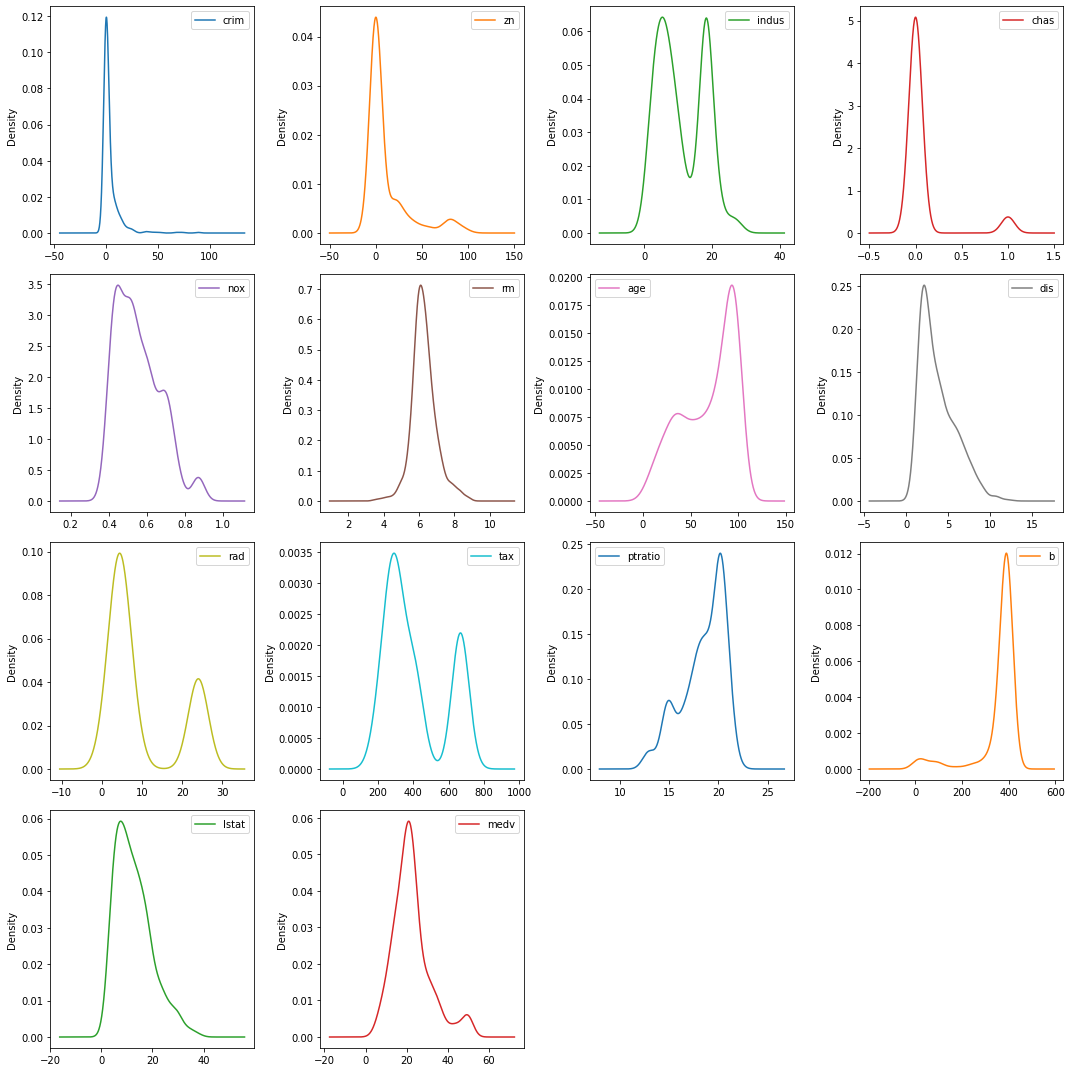

In [29]:
# kernel density plots

df.plot(kind='density', subplots=True, layout=(4,4), sharex=False)
plt.rcParams["figure.figsize"] = (15,15)
plt.tight_layout() # for some room!
plt.show()

## Boxplots

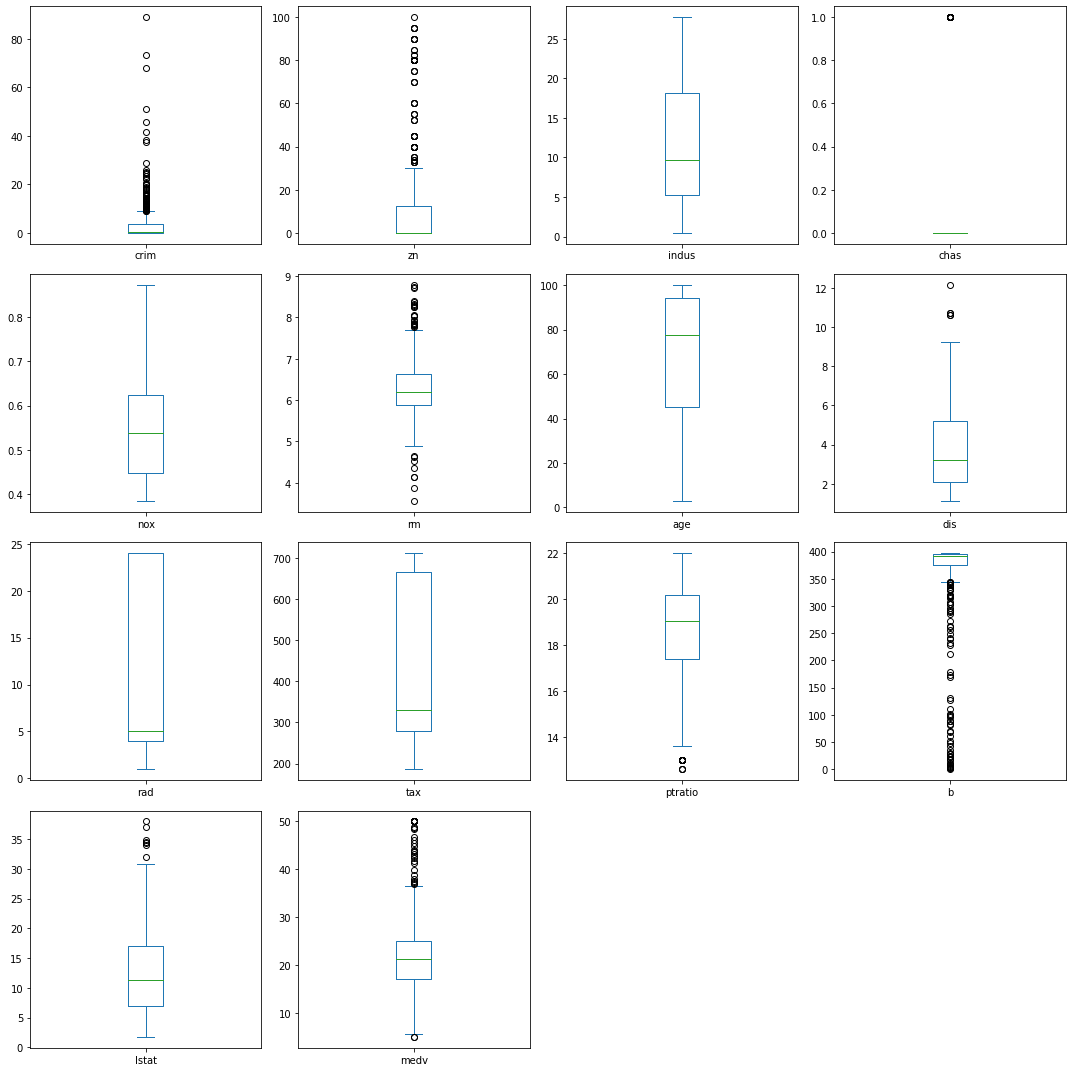

In [30]:
# boxplots
df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False)
plt.rcParams["figure.figsize"] = (15,15)
plt.tight_layout() # for some room!
plt.show()

## Scatterplot Matrix (pair plot)
Of course, you are most interested in the relationship of X input features to the y target variable.

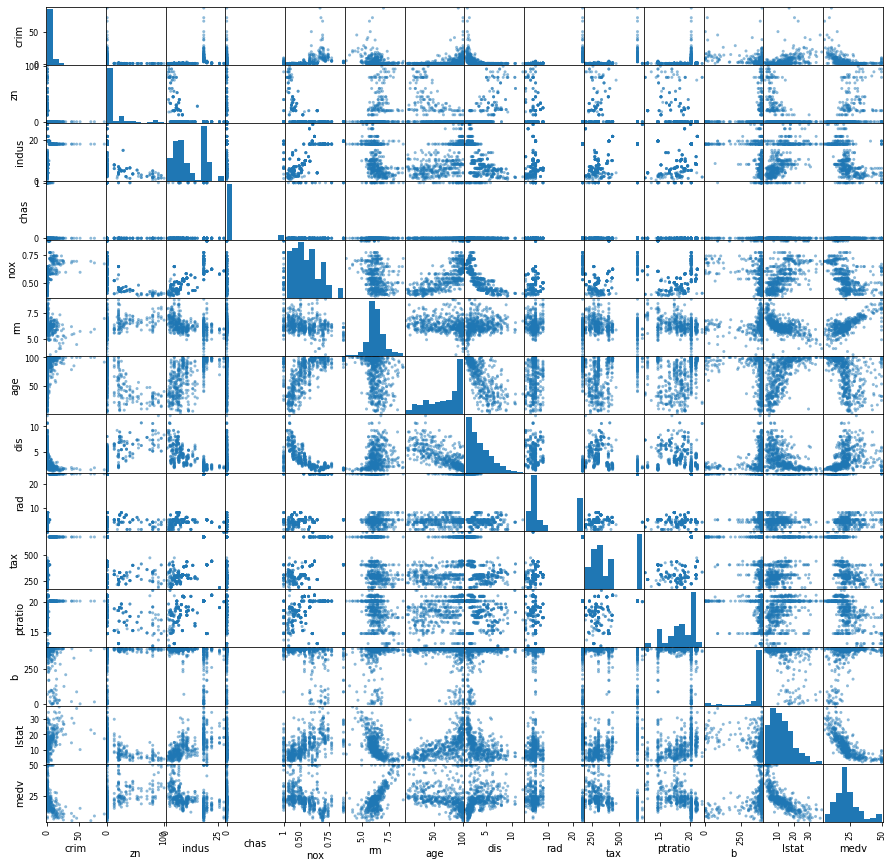

In [31]:
# scatter plot matrix - this can take a minute!
# it can also look a bit cluttered - you can subset columns you are most interested in
# perhaps based on correlation?
pd.plotting.scatter_matrix(df)
plt.show()

## Correlation Matrix
Again, the Pearson (or Spearman) correlation with the target variable is likely most interesting in a ML context. 

In [32]:
# correlation
tmp = df.corr(method='pearson')
tmp = round(tmp, 2) # for readability... round to 2 decimal places
tmp # you can squint your eyes and look at this...

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
zn,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
indus,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
chas,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
nox,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
rm,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
age,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
dis,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
rad,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
tax,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


A graphic is always a better way to communicate what you are looking at.

In [33]:
# this will be better than hard-coding the ticks below...
np.shape(df.columns)[0]

14

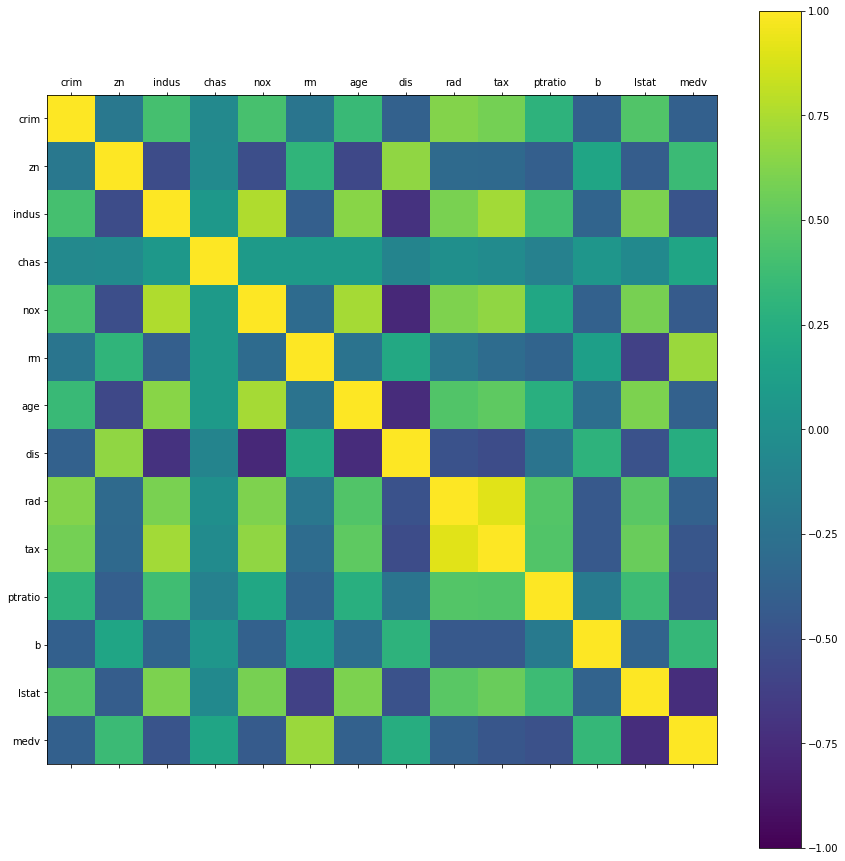

In [34]:
# correlation matrix
# it can be a little involved to draw this with matplotlib
ax = plt.matshow(df.corr(), vmin=-1, vmax=1)
plt.colorbar(ax)
ticks = np.arange(0, np.shape(df.columns)[0], 1) # this is better than a hard-coded solution
plt.xticks(ticks, labels=df.columns)
plt.yticks(ticks, labels=df.columns)
plt.show()

# Prepare Data for Modeling (Split, CV, error metrics)
At this point you are ready to:
* Split into X and y
* Make a train and test partition
* Leverage 10-fold cross-validation
* Add a seed for reproducability
* Make a list of all of the models you are interested in evaluating

In [35]:
# Split-out validation df
X = df.drop('medv', axis=1) #covariates - just drop the target!
y = df['medv'] #target variable
validation_size = 0.20
seed = 123 # so you will split the same way and evaluate the SAME dataset

# split!
X_train, X_test, Y_train, Y_test = train_test_split(X, y, 
                                                                test_size=validation_size, 
                                                                random_state=seed)

# Make a List of Models
At this point, you will make a list of all the models you will use. In a moment, you will run a for loop over these candidate models.

Note: this is SPOT CHECKING - not a pipeline! You are just appending models to a list and aren't doing any pre-processing. `Pipeline()` will include the data pre-processing for you, and you'll have the ability to mix and match.

In [36]:
# Spot Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

Why do we make a list of models? Check it out! They are all there waiting for you... we are accepting the defaults for all of the hyperparameters... that's why `LinearRegression()` has no arguments.

Later on, you will tinker with this and try different hyperparameters! But not yet.

In [37]:
# look at the models you have for evaluation (and their default hyperparameters)
models

[('LR', LinearRegression()),
 ('LASSO', Lasso()),
 ('EN', ElasticNet()),
 ('KNN', KNeighborsRegressor()),
 ('CART', DecisionTreeRegressor()),
 ('SVR', SVR())]

If you checked the documentation for each of these, it would look exactly the same!

# Fit the models and store results
We will use the `cross_val_score()` function from sklearn. We don't have to write the for loop for evaluation ourselves - we can leverage the power of sklearn now that we know what it actually does!

We will perform a 10-fold cross-validation on the TRAIN partition. This will identify the best spot-check model. Then we will tune it and try it on the test partition once we know that this is the best model for us.

[See documentation here for more details.](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)



In [38]:
# Test options and evaluation metric
num_folds = 10 # for 10-fold CV
seed = 7 # for reproducibility
scoring = 'neg_mean_squared_error'

# evaluate each model in turn
results = []
names = []
for name, model in models:
  # this makes an INDEX (between 1 and 10)
	kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
  
  # save the val results from X train 
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: -22.924619 (11.674005)
LASSO: -26.827565 (10.073256)
EN: -27.096825 (9.854622)
KNN: -42.648906 (13.026188)
CART: -23.658300 (12.974039)
SVR: -66.481465 (24.549419)


This is your first nugget of information - folks love just showing the mean and SD of the error metrics - but there is a better way to show your results - as a boxplot. This helps you show if there are any funky folds.

**On your own** - you can try to store the output on model name, mean and std dev of neg_mean_abs_error in a dataframe so that you can manipulate it later or show a nice table in a presentation.

# Evaluate and Compare the Algorithms
It is not only useful to look at the mean value, but also the distribution.

In [39]:
results

[array([-22.98391503, -11.95688227, -20.95948006,  -9.74537225,
        -53.29398077, -17.57906327, -21.91578618, -20.26047877,
        -32.16517432, -18.38605618]),
 array([-25.12350913, -15.27708398, -28.28363196, -13.17935909,
        -49.35004249, -24.30858131, -25.32905423, -21.19370828,
        -38.74243641, -27.48823886]),
 array([-25.40089372, -16.00050757, -29.00147162, -13.57570211,
        -48.69992276, -24.49461488, -25.69766028, -21.46781166,
        -39.40773309, -27.22192816]),
 array([-54.3531122 , -25.2408878 , -24.43179512, -46.60336585,
        -62.96214   , -33.22576   , -47.56644   , -28.60956   ,
        -54.98773   , -48.50827   ]),
 array([-19.05878049, -14.15756098, -17.50146341, -39.34219512,
        -12.483     , -53.7785    , -12.89425   , -13.1115    ,
        -28.65375   , -25.602     ]),
 array([ -68.09736827,  -56.02589257,  -52.67893359,  -34.2238836 ,
        -100.76958583,  -31.91328082,  -86.67176714,  -46.68923187,
         -96.44252708,  -91.302177

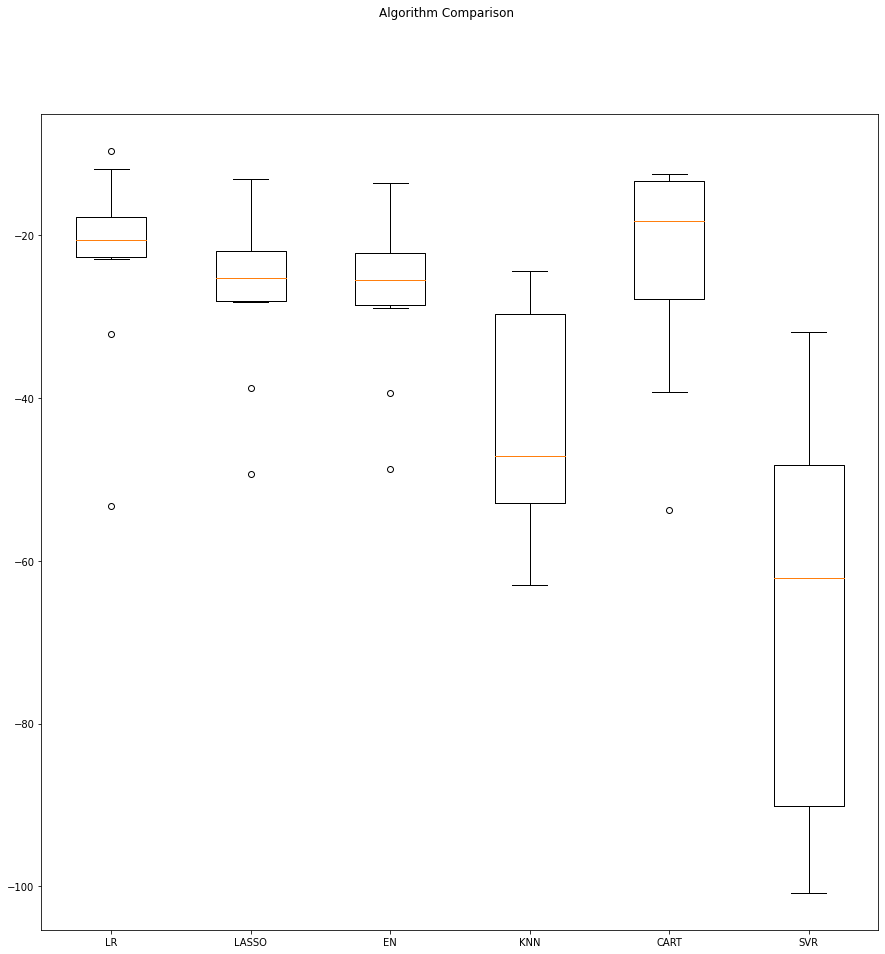

In [40]:
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.suptitle('Algorithm Comparison')
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

Our metric is neg_mean_abs_err - sklearn has negative metrics so that lower is always better no matter than the error metric is! Hence, SVR looks like the worst model linear regression may be the best model (tightest boxplot and closest to zero, which would be zero error).

You could stop here - but that's what a newbie data scientist would do. You haven't really put this data to work - you accepted the defaults and spit SOMETHING out. It's correct, but is it your best?

We simply haven't used all of the ML tools that are available to us. What if we wanted to **scale the data or pre-process it in some way?** What if we wanted to evaluate different pre-processing methods in the data (like `MinMaxScaler` vs. `StandardScaler` or `PCA` vs. not?) This could get messy very quickly...

Fortunately, there are PIPELINES that are easy for condensing our script and making it less prone to error. See below for details.

**On your own** - after you store the numeric output, try to add the means as red dots on top of the boxplot. That way your audience will be able to see it!

# Pipelines (with a capital P) and `StandardScaler()`
Pipelines are so incredibly useful.

**P**ipelines are all about **p**re-processing. *See what I did there? :)*

Later on, you will see that we can try evaluating models with and without PCA (and no longer do we have to use all of those annoying `fit_transform` vs. `fit` statements!)

You are going to love that we can cut down all the intermediate code and functions. Look at how we can incorporate some simple pre-processing steps in our pipeline. This would be a bit more involved if we had to code the pre-processing directly into our for loop.

In [41]:
# Standardize the df
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
pipelines

[('ScaledLR',
  Pipeline(steps=[('Scaler', StandardScaler()), ('LR', LinearRegression())])),
 ('ScaledLASSO',
  Pipeline(steps=[('Scaler', StandardScaler()), ('LASSO', Lasso())])),
 ('ScaledEN',
  Pipeline(steps=[('Scaler', StandardScaler()), ('EN', ElasticNet())])),
 ('ScaledKNN',
  Pipeline(steps=[('Scaler', StandardScaler()), ('KNN', KNeighborsRegressor())])),
 ('ScaledCART', Pipeline(steps=[('Scaler', StandardScaler()),
                  ('CART', DecisionTreeRegressor())])),
 ('ScaledSVR', Pipeline(steps=[('Scaler', StandardScaler()), ('SVR', SVR())]))]

ScaledLR: -22.924619 (11.674005)
ScaledLASSO: -27.183598 (11.005928)
ScaledEN: -29.742510 (12.974321)
ScaledKNN: -21.559570 (11.887549)
ScaledCART: -24.135263 (10.632435)
ScaledSVR: -30.780309 (11.939518)


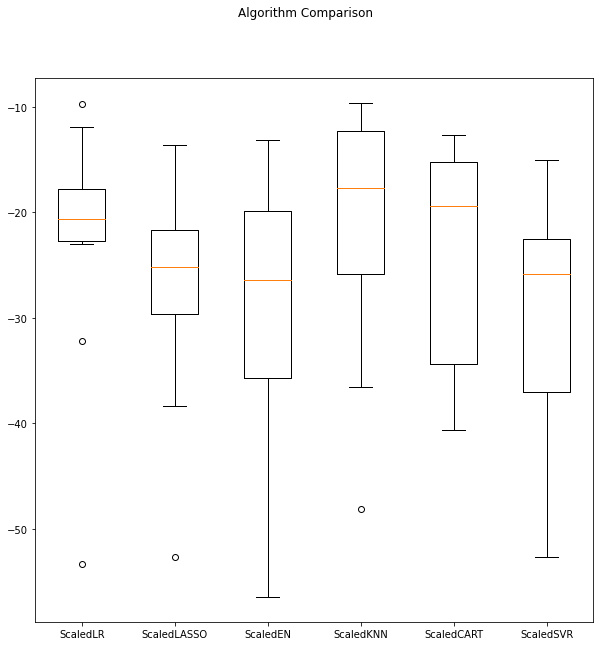

In [42]:
results = []
names = []
for name, model in pipelines:
	kfold = KFold(n_splits=num_folds, random_state=seed,
               shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, 
                              cv=kfold, 
                              scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

plt.boxplot(results, labels=names)
plt.suptitle('Algorithm Comparison')
plt.rcParams["figure.figsize"] = (10,10)
plt.show()



**WHOA!** Scaling seems to help the models converge and agree better, and further, it looks like KNN happens to be the 'best' model. Rather than doing a grid search on all of these algorithms, let's just focus on KNN and see if we can get a better fit than ~-21 for the error.

## Hyperparameter Tuning the Best Model: KNN
Now that you know which model is best, you can focus all of your attention on it. We previously used KNN for SMOTE - you are simply looking for the k-nearest neighbors in N dimensional space, where N is the number of features.

In [43]:
X.shape # there are 13 columns in X, so we are looking
# for nearest neighbors in 13 dimensional space 

(506, 13)

Note that it's important to use min/max scaling so that you find the CLOSEST neighbor. The nearest neighbor is still identified by a Euclidean distance formula in N dimensional space!

When you do your grid search, you will need to use a dictionary. You may see a few different variants of specifying a dictinary across our examples - just use the one that's easiest for you. 

In [44]:
# KNN Algorithm tuning

# we prepare the X data
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train) # we are overwriting the original X_train with the scaled data

# don't forget to transform X_test!
X_test = scaler.transform(X_test) # same for the test partition

# these are the values of neighbors we will evaluate
# knn only has one knob for us to turn (so it's a great place to start!)
k_values = np.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -19.522438 using {'n_neighbors': 3}
-24.652183 (11.748764) with: {'n_neighbors': 1}
-19.522438 (9.513528) with: {'n_neighbors': 3}
-21.716449 (11.905743) with: {'n_neighbors': 5}
-21.883935 (12.513500) with: {'n_neighbors': 7}
-22.455712 (11.879749) with: {'n_neighbors': 9}
-22.511966 (12.030164) with: {'n_neighbors': 11}
-22.713570 (12.118886) with: {'n_neighbors': 13}
-23.860189 (12.464150) with: {'n_neighbors': 15}
-23.742487 (12.462714) with: {'n_neighbors': 17}
-24.536549 (12.692087) with: {'n_neighbors': 19}
-24.791667 (12.823736) with: {'n_neighbors': 21}


**On your own** - you could try generating the boxplots for different k values (like we did for individual models, so you could show the value of hyperparameter tuning in a presentation!) 

Looking at this output, you can see that when neighbors equals 3 you get the best performance (lowest error!) Then you can try this configuration of the algorithm on the test partition.

In [45]:
# retrain the model with the best configuration
from sklearn.metrics import mean_squared_error
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, Y_train)
test_preds = model.predict(X_test)
print(mean_squared_error(test_preds, Y_test))

27.1190522875817


Your model results might be slightly different due to randomness.

# Pipelines with Ensemble Methods
This is still a pipeline - we have just named our list `ensembles` instead of `pipeline`. Notice that the `Pipeline()` function is inside each append statement.

You can tinker with ANY NUMBER of algorithms! Here are a few you may consider:
* AdaBoost Regressor
* Gradient Boosting Regressor (you have some experience with this one!)
* Random Forest Regressor (this one too!)
* Extra Trees Regressor

Note here at this point that you are still just 'spot checking' with the model defaults. This is a perfectly reasonable way to approach a new dataset.

ScaledAB: -14.563650 (7.150306)
ScaledGBM: -10.403220 (5.842125)
ScaledRF: -11.183948 (4.628187)
ScaledET: -9.182691 (4.865394)


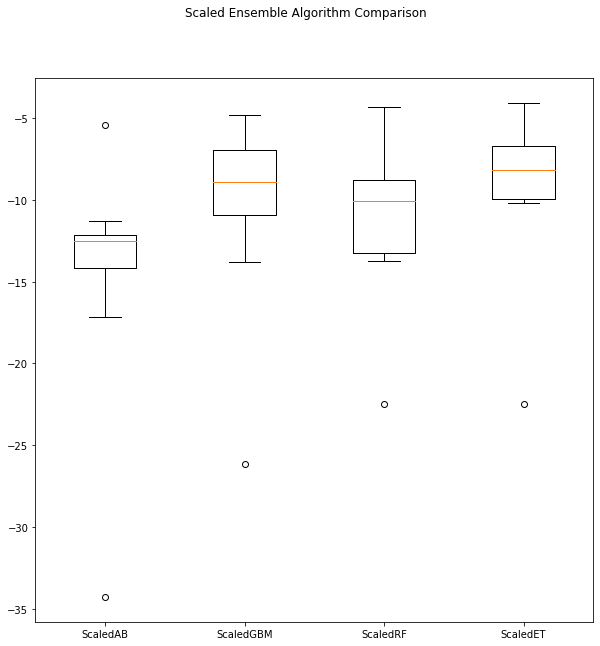

In [46]:
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor())])))
results = []
names = []
for name, model in ensembles:
	kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

And look! Of course we get even better results when we start to include more advanced ensemble models. These take longer to run, but you are certainly welcome to evaluate them when looking at a new dataset for the first time.

GBM was our best model - let's show how we can use both the `dict()` function vs. actually using curly brackets `{}`.

Note how we are tuning two hyperparameters below - each needs its own list in the dictionary since there are multiple values. How many models are we fitting below? 28! This is why it might take so long to run. 

In [47]:
# Tune scaled GBM

# recall that we did all of our scaling earlier

# param_grid = dict(n_estimators=[50,100,150,200,250,300,350,400]) # note the use of dict()

# let's try curley brackets this time!
# AND, let's tune more than one thing
param_grid = {'n_estimators':[50,100,150,200,250,300,350,400],
              'max_depth': [3,5,10,15]} 

model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -10.067262 using {'max_depth': 3, 'n_estimators': 200}
-11.245458 (6.294893) with: {'max_depth': 3, 'n_estimators': 50}
-10.491830 (5.799374) with: {'max_depth': 3, 'n_estimators': 100}
-10.150262 (5.608292) with: {'max_depth': 3, 'n_estimators': 150}
-10.067262 (5.592458) with: {'max_depth': 3, 'n_estimators': 200}
-10.123152 (5.576939) with: {'max_depth': 3, 'n_estimators': 250}
-10.118911 (5.595192) with: {'max_depth': 3, 'n_estimators': 300}
-10.188771 (5.572736) with: {'max_depth': 3, 'n_estimators': 350}
-10.210334 (5.547819) with: {'max_depth': 3, 'n_estimators': 400}
-13.259880 (6.747815) with: {'max_depth': 5, 'n_estimators': 50}
-12.944838 (6.573509) with: {'max_depth': 5, 'n_estimators': 100}
-12.950179 (6.542878) with: {'max_depth': 5, 'n_estimators': 150}
-12.952937 (6.535503) with: {'max_depth': 5, 'n_estimators': 200}
-12.957363 (6.528805) with: {'max_depth': 5, 'n_estimators': 250}
-12.963144 (6.522373) with: {'max_depth': 5, 'n_estimators': 300}
-12.966142 (6.516

**On your own** - look at that beautiful output! Don't you want to capture all of this good information and store in a dataframe? Try appending values to a list then convert to a dataframe so it's easier to work with.

In [48]:
# Make predictions on validation df

# recall that we already did our scaling of the test and train partition early on

# prepare the model
model = GradientBoostingRegressor(random_state=seed, n_estimators=200, max_depth=3)
model.fit(X_train, Y_train)
test_preds = model.predict(X_test)
print(mean_squared_error(Y_test, test_preds))

16.416703520331055


# Conclusion

If you scroll up, you saw that the tuned KNN achieved a mean squared error of ~34 vs. ~16 for the tuned GBR! It makes a lot of sense to scale your data and try different models. Clearly, you are leaving money (model performance, lower error) on the table if you just accept the model defaults.

As a data scientist, you need to have a solid framework into how you're going to wrangle and model a new dataset. You are starting to get there - spot check is TOTALLY VALID and a great way to approach a problem. But we if we could extend on this and perform a grid search on ALL MODELS as we went along?

Things will get complicated quickly - we have a lot of moving parts here - lots of different hyperparameters to try...

Fortunately, we will have pipelines to help keep us organized. Stay tuned. The best is yet to come!

Take some time and try the **'on your own'** exercises - they will make you a better modeler, coder and data storyteller.

# Resources
* Look at all of the supervised methods you can try...
  * https://scikit-learn.org/stable/supervised_learning.html
* Look at all of the pre-processing you can try...
  * https://scikit-learn.org/stable/modules/preprocessing.html
* Jason Brownlee's excellent article on spot-checking, was the inspiration for this notebook
  * https://machinelearningmastery.com/spot-check-machine-learning-algorithms-in-python/

Feel free to enhance your pipelines with more methods!